## 熵权法计算流程

设标准化后的数据矩阵为 $X = [x_{ij}]$，共 $m$ 个企业、$n$ 个指标。

1. **计算比例矩阵**：
   $$ p_{ij} = \frac{x_{ij}}{\sum_{i=1}^m x_{ij}} $$

2. **计算熵值**：
   $$ e_j = -k \sum_{i=1}^m p_{ij} \ln(p_{ij}) \quad (k = \frac{1}{\ln m}) $$

3. **计算权重**：
   $$ d_j = 1 - e_j \quad , \quad w_j = \frac{d_j}{\sum d_j} $$


## TOPSIS评分流程

1. **构造加权矩阵**：
   $$ v_{ij} = w_j \cdot x_{ij} $$

2. **理想解与负理想解**：
   $$ A^+ = \max_i v_{ij} \quad , \quad A^- = \min_i v_{ij} $$

3. **计算距离**：
   $$ D_i^+ = \sqrt{ \sum_j (v_{ij} - A^+_j)^2 } \quad , \quad D_i^- = \sqrt{ \sum_j (v_{ij} - A^-_j)^2 } $$

4. **得分计算**：
   $$ C_i = \frac{D_i^-}{D_i^+ + D_i^-} \quad \text{越大越好} $$


选出企业:

   企业编号      综合得分
0    19  0.660110
1     4  0.591810
2    14  0.586936
3     9  0.544848
4     2  0.542597
5    11  0.516497
6    16  0.491289

已将结果保存至 data/selected_enterprises_from_model.csv


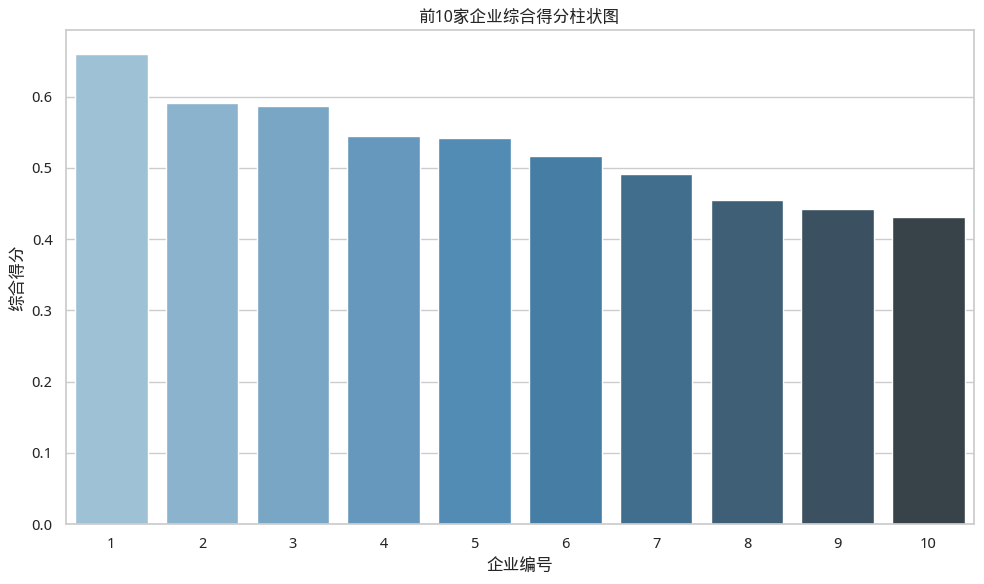

In [10]:
import warnings
# question1.ipynb

import pandas as pd
from src.utils.selection import select_top_enterprises
from src.utils.visualize import plot_scores
warnings.filterwarnings("ignore")

# 1. 数据读取
enterprise_df = pd.read_csv('../../data/enterprise_info.csv')

# 2. 选择前 7 家企业
selected_df = select_top_enterprises(enterprise_df, top_n=7, method='entropy_topsis')

# 3. 显示结果
print("\u9009\u51fa\u4f01\u4e1a:\n")
print(selected_df[['企业编号', '综合得分']])

# 4. 保存结果
selected_df.to_csv('../../data/selected_enterprises_from_model.csv', index=False)
print("\n已将结果保存至 data/selected_enterprises_from_model.csv")
plot_scores(enterprise_df.assign(综合得分=select_top_enterprises(enterprise_df, top_n=20)['综合得分']))